
1a


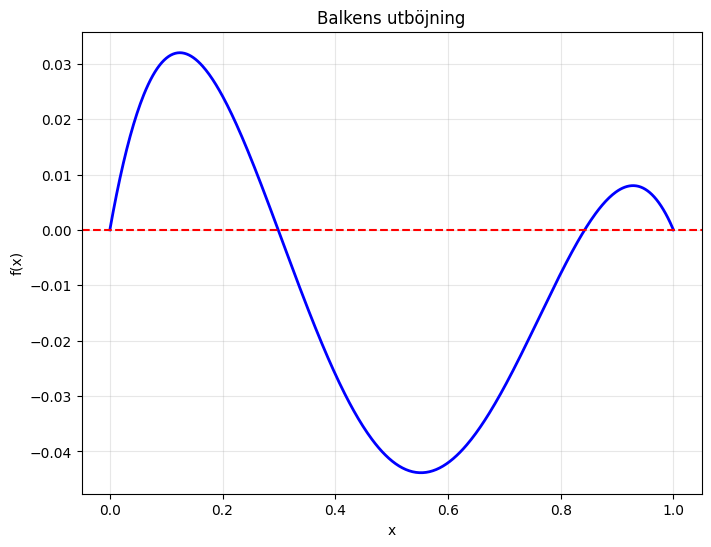


1c: Fixpunkt
  n             x_n         |Δx|
  1    0.1383882499     1.16e-02
  2    0.1265120055     1.19e-02
  3    0.1145197468     1.20e-02
  4    0.1025821518     1.19e-02
  5    0.0908839945     1.17e-02
  6    0.0796127781     1.13e-02
  7    0.0689452507     1.07e-02
  8    0.0590337274     9.91e-03
  9    0.0499945347     9.04e-03
 10    0.0419006420     8.09e-03
 11    0.0347796572     7.12e-03
 12    0.0286171283     6.16e-03
 13    0.0233639531     5.25e-03
 14    0.0189460477     4.42e-03
 15    0.0152743783     3.67e-03
 16    0.0122538897     3.02e-03
 17    0.0097905030     2.46e-03
 18    0.0077959491     1.99e-03
 19    0.0061906267     1.61e-03
 20    0.0049048850     1.29e-03
 21    0.0038791856     1.03e-03
 22    0.0030635517     8.16e-04
 23    0.0024166256     6.47e-04
 24    0.0019045634     5.12e-04
 25    0.0014999116     4.05e-04
 26    0.0011805540     3.19e-04
 27    0.0009287705     2.52e-04
 28    0.0007304240     1.98e-04
 29    0.0005742733     1.56e

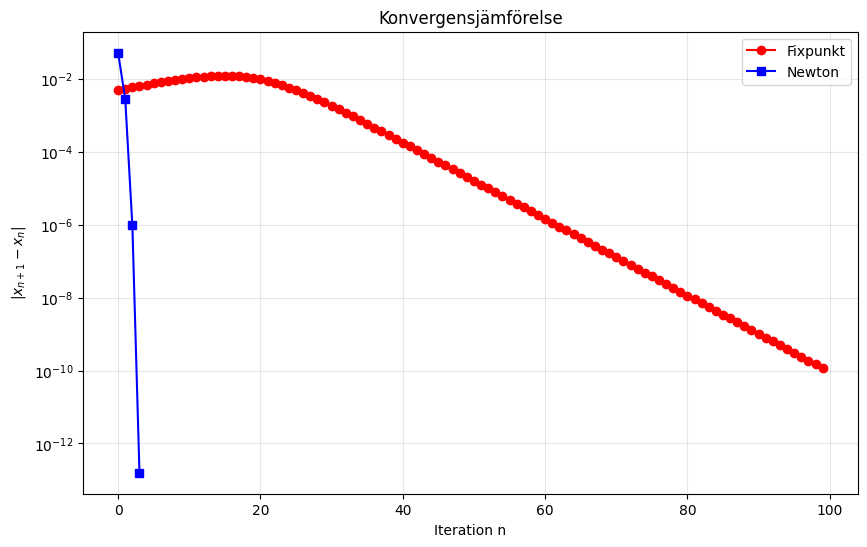

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def clear_console():
    os.system('clear')

L = 1.0
tol = 1e-10
max_iter = 100

f = lambda x: (8/3)*(x/L) - 3*(x/L)**2 + (1/3)*(x/L)**3 - (2/3)*np.sin(np.pi*x/L)

def func(x):
    fx = (8/3)*(x/L) - 3*(x/L)**2 + (1/3)*(x/L)**3 - (2/3)*np.sin(np.pi*x/L)
    fprim = (8/3)/L - 6*(x/L)/L + (x/L)**2/L - (2/3)*(np.pi/L)*np.cos(np.pi*x/L)
    return fx, fprim

g = lambda x: (3*L/8)*(3*(x/L)**2 - (1/3)*(x/L)**3 + (2/3)*np.sin(np.pi*x/L))

def plot_f():
    x = np.linspace(0, L, 500)
    y = f(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'b-', linewidth=2)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Balkens utböjning")
    plt.grid(True, alpha=0.3)
    plt.show()
    

def fixpunkt_whileloop(g, x0, tol, max_iter):
    # Från exfpiPrincipenWithcosApp.py
    x = x0
    DeltaX = tol + 1.0
    n = 0
    
    print(f"{'n':>3} {'x_n':>15} {'|Δx|':>12}")
    
    while DeltaX > tol:
        n += 1
        xold = x
        x = g(xold)
        DeltaX = np.abs(x - xold)
        print(f"{n:3d} {x:15.10f} {DeltaX:12.2e}")
        
        if n > max_iter:
            raise RuntimeError("Fixpunkt konvergerade inte")
    
    return x, n

def newton_whileloop(func, x0, tol, max_iter): # Kolla derivata 0 (felhantering)
    # Från exNewtonApp.py
    x = x0
    DeltaX = tol + 1.0
    n = 0
    
    print(f"{'n':>3} {'x_n':>15} {'|Δx|':>12}")
    
    while DeltaX > tol:
        n += 1
        fx, fprim = func(x)
        xnew = x - fx/fprim
        DeltaX = np.abs(xnew - x)
        print(f"{n:3d} {xnew:15.10f} {DeltaX:12.2e}") 
        x = xnew
        
        if n > max_iter:
            raise RuntimeError("Newton konvergerade inte")
    
    return x, n

def compare_convergence(g, func, x0, tol, max_iter):
    # Fixpunkt
    x_fp = x0
    DeltaX = tol + 1.0
    n = 0
    err_fp = []
    
    while DeltaX > tol and n < max_iter:
        n += 1
        xold = x_fp
        x_fp = g(xold)
        DeltaX = np.abs(x_fp - xold)
        err_fp.append(DeltaX)
    
    # Newton
    x_n = x0
    DeltaX = tol + 1.0
    n = 0
    err_n = []
    
    while DeltaX > tol and n < max_iter:
        n += 1
        fx, fprim = func(x_n)
        xnew = x_n - fx/fprim
        DeltaX = np.abs(xnew - x_n)
        err_n.append(DeltaX)
        x_n = xnew
    
    plt.figure(figsize=(10, 6))
    plt.semilogy(err_fp, 'o-', color='red', label='Fixpunkt')
    plt.semilogy(err_n, 's-', color='blue', label='Newton')
    plt.xlabel("Iteration n")
    plt.ylabel(r"$|x_{n+1} - x_n|$")
    plt.title("Konvergensjämförelse")
    plt.legend()
    plt.grid(True, which='both', alpha=0.3)
    plt.show()

def main(): 
    clear_console()
    print("\n1a")
    plot_f()
    
    print("\n1c: Fixpunkt")
    root_fp, iter_fp = fixpunkt_whileloop(g, 0.15, tol, max_iter)
    print(f"Rot: {root_fp:.10f}, {iter_fp} iter")
    print(f"f(x) = {f(root_fp):.2e}")
    
    print("\n1d: Newton")
    root_n, iter_n = newton_whileloop(func, 0.7, tol, max_iter)
    print(f"Rot: {root_n:.10f}, {iter_n} iter")
    print(f"f(x) = {f(root_n):.2e}")
    
    print("\n1e: Konvergens")
    compare_convergence(g, func, 0.25, tol, max_iter)
    
if __name__ == "__main__":
    main()